# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [38]:

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.preprocessing import LabelEncoder  
from sklearn.model_selection import train_test_split  
from sklearn.cluster import KMeans  
from sklearn.decomposition import PCA  


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [39]:
file_path = 'bank_transactions_data_edited.csv' 
data = pd.read_csv(file_path)
data.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

 1: Memahami Struktur Data

In [40]:
print("Jumlah baris dan kolom:", data.shape)
print("\nTipe data tiap kolom:")
print(data.dtypes)

Jumlah baris dan kolom: (2537, 16)

Tipe data tiap kolom:
TransactionID               object
AccountID                   object
TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
DeviceID                    object
IP Address                  object
MerchantID                  object
Channel                     object
CustomerAge                float64
CustomerOccupation          object
TransactionDuration        float64
LoginAttempts              float64
AccountBalance             float64
PreviousTransactionDate     object
dtype: object


2: Menangani Data yang Hilang

In [41]:
missing_data = data.isnull().sum()
print("\nData yang hilang sebelum imputasi:")
print(missing_data)


Data yang hilang sebelum imputasi:
TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


In [42]:
# Pilih hanya kolom numerik
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Mengisi nilai yang hilang hanya untuk kolom numerik dengan rata-rata
data_filled = data.copy()  # Copy the original data to avoid modifying it in-place
data_filled[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Periksa data yang hilang setelah imputasi
missing_data_after = data_filled.isnull().sum()
print("\nData yang hilang setelah imputasi:")
print(missing_data_after)



Data yang hilang setelah imputasi:
TransactionID              29
AccountID                  21
TransactionAmount           0
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                 0
CustomerOccupation         23
TransactionDuration         0
LoginAttempts               0
AccountBalance              0
PreviousTransactionDate    24
dtype: int64


In [43]:
# Pilih hanya kolom kategorikal
categorical_cols = data.select_dtypes(include=['object']).columns

# Mengisi nilai yang hilang untuk kolom kategorikal dengan modus
data_filled[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# Periksa data yang hilang setelah imputasi
missing_data_after = data_filled.isnull().sum()
print("\nData yang hilang setelah imputasi:")
print(missing_data_after)



Data yang hilang setelah imputasi:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


3: Analisis Distribusi dan Korelasi

In [44]:
# Statistik deskriptif untuk variabel numerik
print("\nStatistik deskriptif untuk variabel numerik:")
print(data.describe())


Statistik deskriptif untuk variabel numerik:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2511.000000  2519.000000          2511.000000    2516.000000   
mean          297.656468    44.678444           119.422939       1.121622   
std           292.230367    17.837359            70.078513       0.594469   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.310000    27.000000            63.000000       1.000000   
50%           211.360000    45.000000           112.000000       1.000000   
75%           413.105000    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2510.000000  
mean      5113.438124  
std       3897.975861  
min        101.250000  
25%       1504.727500  
50%       4734.110000  
75%       7672.687500  
max      14977.990000  


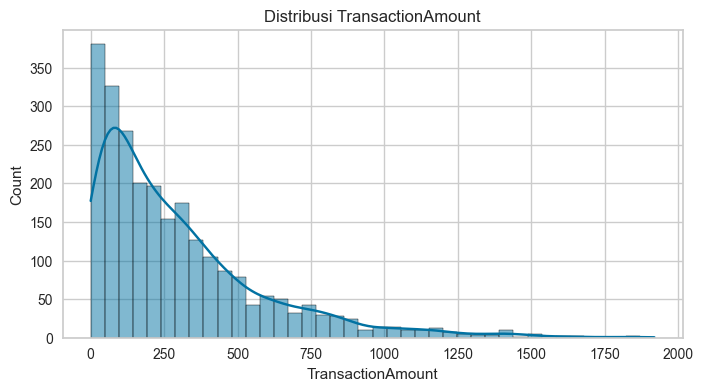

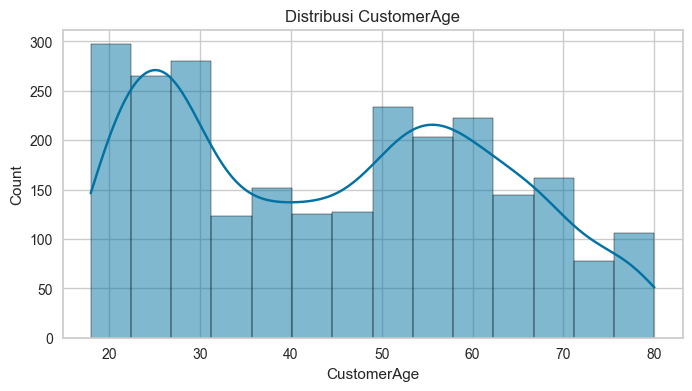

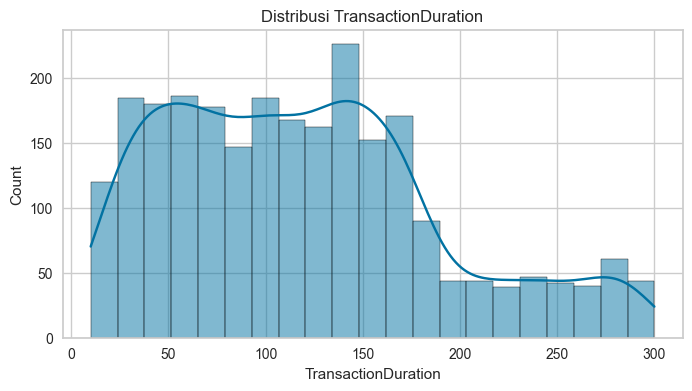

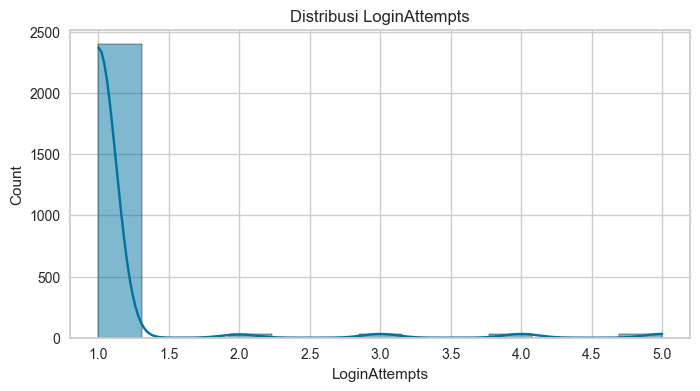

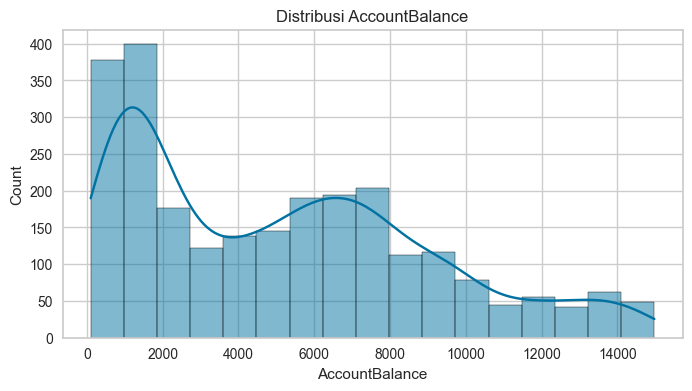

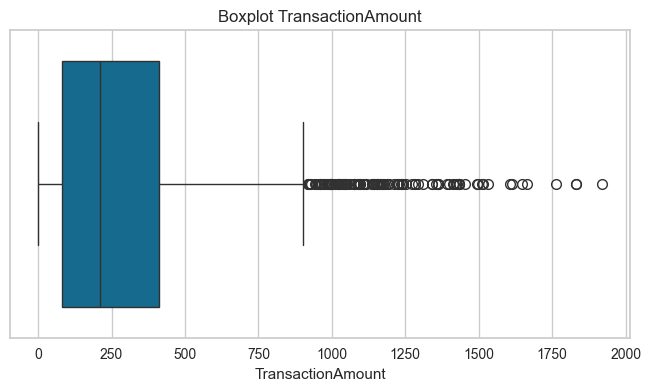

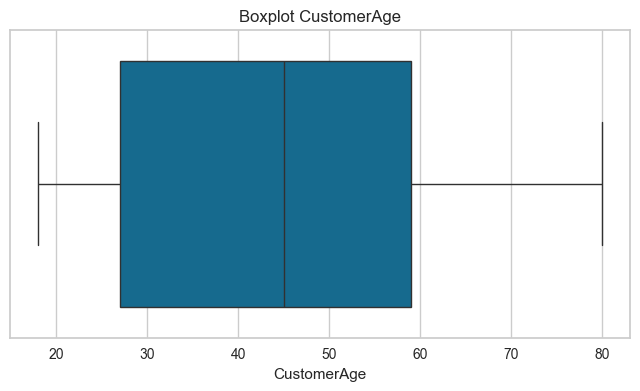

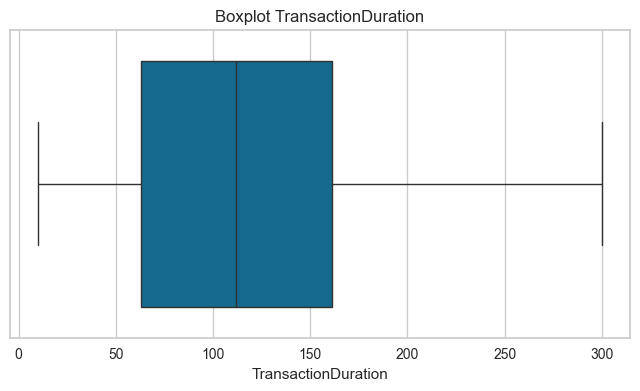

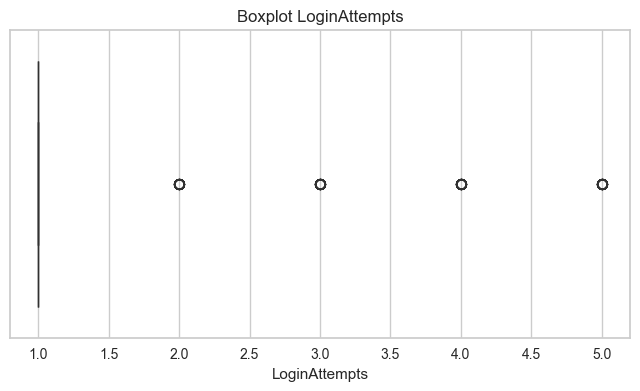

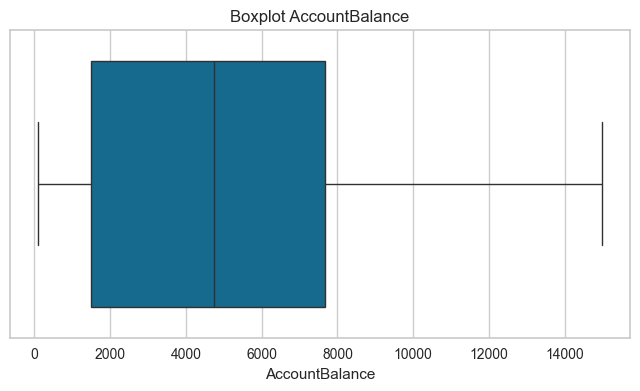

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi untuk variabel numerik
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Histogram untuk setiap variabel numerik
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()

# Boxplot untuk setiap variabel numerik
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot {col}')
    plt.show()


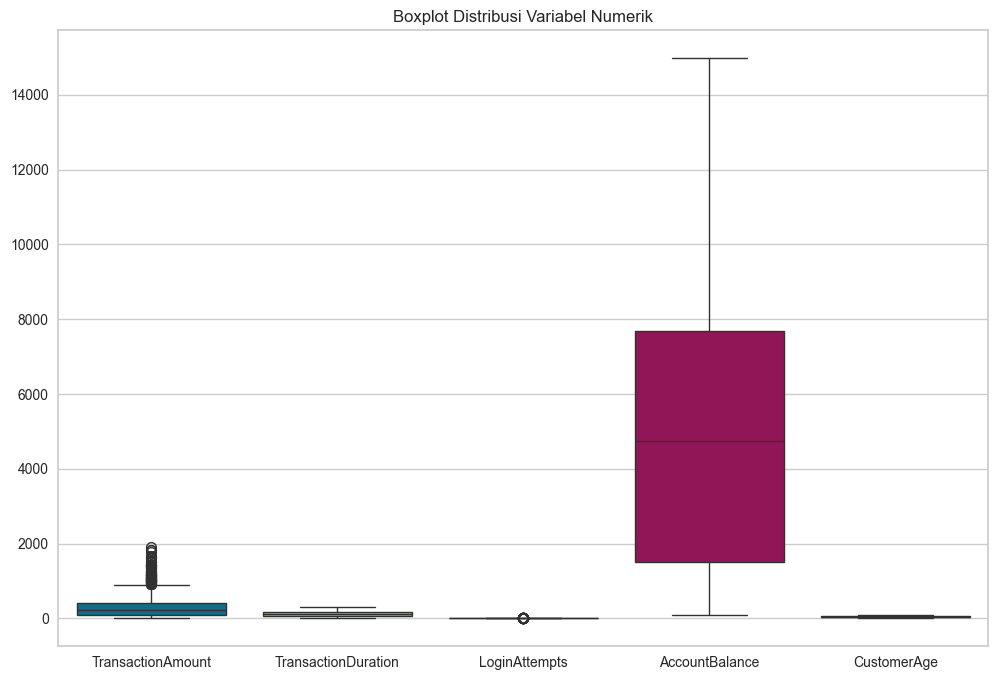

In [46]:
# Boxplot untuk visualisasi distribusi variabel numerik
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'CustomerAge']])
plt.title('Boxplot Distribusi Variabel Numerik')
plt.show()

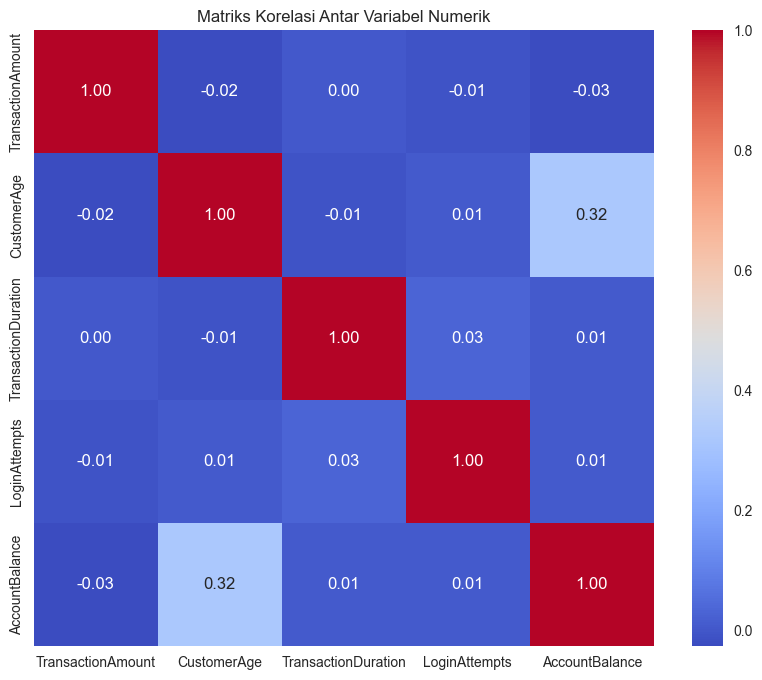

In [47]:
# Matriks korelasi antar variabel numerik
# Pilih hanya kolom numerik untuk analisis korelasi
numerical_data = data.select_dtypes(include=[np.number])

# Matriks korelasi antar variabel numerik
correlation_matrix = numerical_data.corr()

# Visualisasi matriks korelasi dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Antar Variabel Numerik')
plt.show()


4: Visualisasi Data Kategorikal

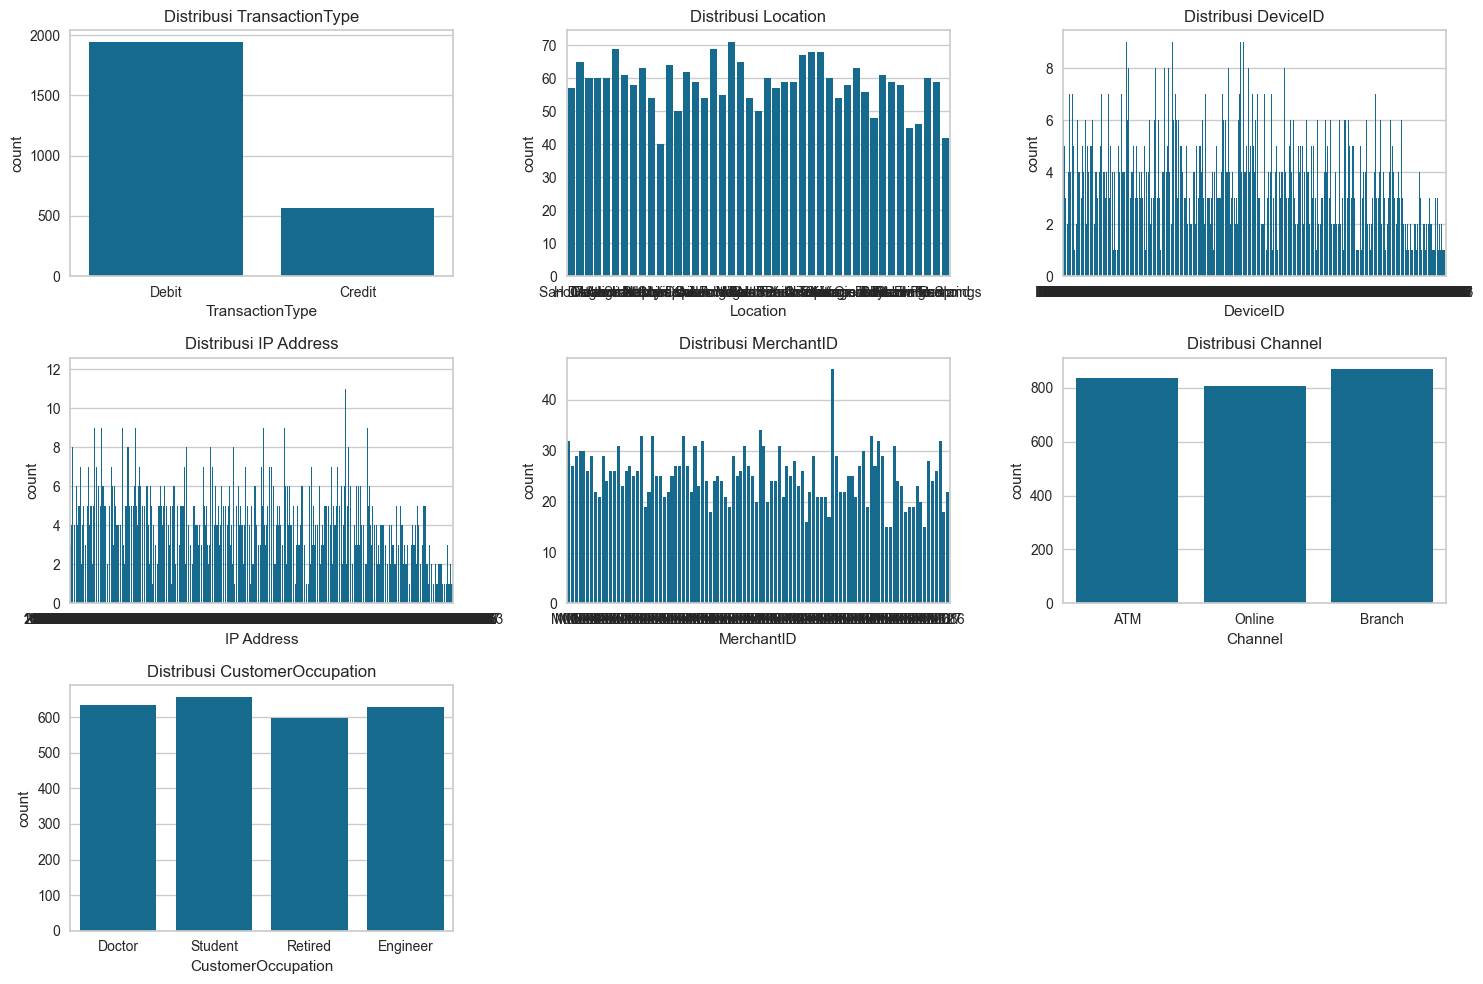

In [48]:
# Visualisasi distribusi untuk variabel kategorikal dengan diagram batang
categorical_columns = ['TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation']

plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=data[column])
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

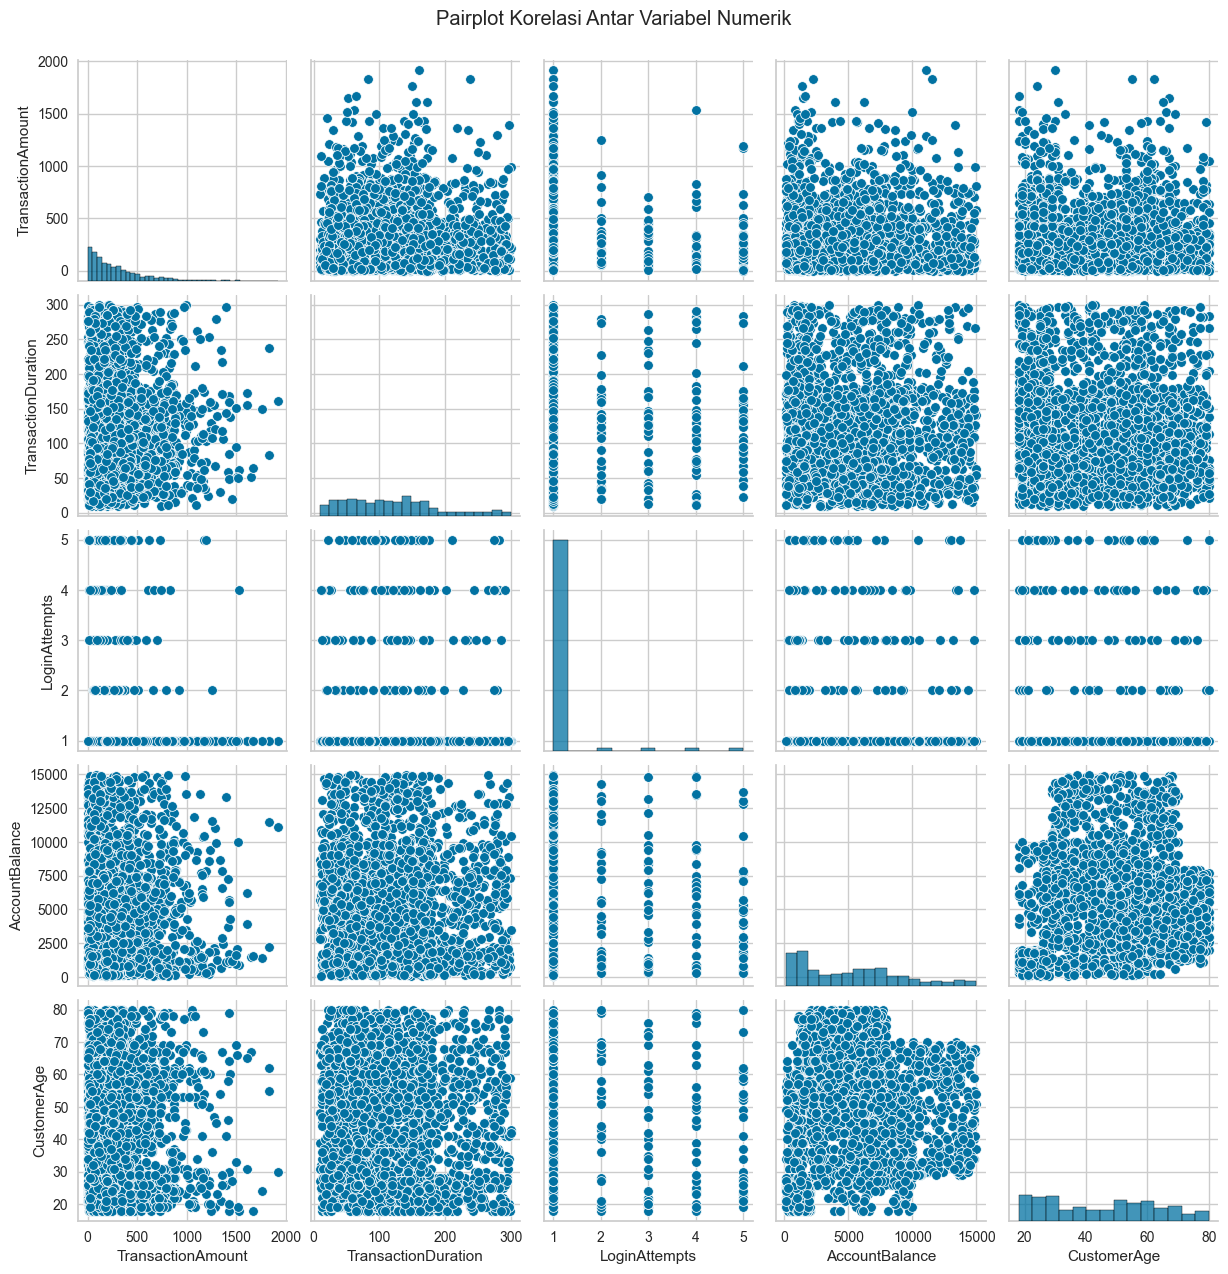

In [49]:
# Pairplot untuk menganalisis korelasi antar variabel numerik
sns.pairplot(data[['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'CustomerAge']])
plt.suptitle('Pairplot Korelasi Antar Variabel Numerik', y=1.02)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

1. Menghapus atau menangani Data Kosong / Missing Values

In [50]:

# Mengisi data yang hilang pada kolom numerik dengan median
data['TransactionAmount'].fillna(data['TransactionAmount'].median(), inplace=True)
data['TransactionDuration'].fillna(data['TransactionDuration'].median(), inplace=True)
data['LoginAttempts'].fillna(data['LoginAttempts'].median(), inplace=True)
data['AccountBalance'].fillna(data['AccountBalance'].median(), inplace=True)

# Mengisi 'CustomerAge' yang hilang dengan median
data['CustomerAge'].fillna(data['CustomerAge'].median(), inplace=True)

# Mengisi kolom tanggal yang hilang dengan tanggal default
data['TransactionDate'].fillna('2024-01-01 00:00:00', inplace=True)
data['PreviousTransactionDate'].fillna('2024-01-01 00:00:00', inplace=True)

# Mengisi kolom kategorikal yang hilang dengan modus
categorical_columns = ['TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation']

for column in categorical_columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

# Mengecek kembali apakah masih ada data yang hilang
missing_data_after = data.isnull().sum()
print("\nData yang hilang setelah imputasi:")
print(missing_data_after)



Data yang hilang setelah imputasi:
TransactionID              29
AccountID                  21
TransactionAmount           0
TransactionDate             0
TransactionType             0
Location                    0
DeviceID                    0
IP Address                  0
MerchantID                  0
Channel                     0
CustomerAge                 0
CustomerOccupation          0
TransactionDuration         0
LoginAttempts               0
AccountBalance              0
PreviousTransactionDate     0
dtype: int64


C:\Users\omen\AppData\Local\Temp\ipykernel_15968\3619384873.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TransactionAmount'].fillna(data['TransactionAmount'].median(), inplace=True)
C:\Users\omen\AppData\Local\Temp\ipykernel_15968\3619384873.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [51]:
# Mengelompokkan usia pelanggan menjadi kategori
bins = [0, 18, 30, 40, 50, 60, 100]
labels = ['<18', '18-30', '30-40', '40-50', '50-60', '60+']
data['AgeGroup'] = pd.cut(data['CustomerAge'], bins=bins, labels=labels)

# Tampilkan hasil preprocessing
print("Data setelah preprocessing:")
print(data.head())

Data setelah preprocessing:
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0             

2. Menghapus data duplikat

In [52]:
print("\nData yang hilang:")
print(data.isnull().sum())

print("\nJumlah duplikat data:")
print(data.duplicated().sum())


Data yang hilang:
TransactionID              29
AccountID                  21
TransactionAmount           0
TransactionDate             0
TransactionType             0
Location                    0
DeviceID                    0
IP Address                  0
MerchantID                  0
Channel                     0
CustomerAge                 0
CustomerOccupation          0
TransactionDuration         0
LoginAttempts               0
AccountBalance              0
PreviousTransactionDate     0
AgeGroup                    0
dtype: int64

Jumlah duplikat data:
22


In [53]:
# Menghapus duplikat
data_cleaned = data.drop_duplicates()

# Cek ukuran data setelah menghapus duplikat
print("\nUkuran data setelah menghapus duplikat:")
print(data_cleaned.shape)


Ukuran data setelah menghapus duplikat:
(2515, 17)


In [54]:
 #Mengisi data yang hilang pada kolom numerik dengan median
numerical_columns = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'CustomerAge']
data[numerical_columns] = data[numerical_columns].apply(lambda x: x.fillna(x.median()))

# Mengisi kolom tanggal yang hilang dengan tanggal default
data['TransactionDate'].fillna('2024-01-01 00:00:00', inplace=True)
data['PreviousTransactionDate'].fillna('2024-01-01 00:00:00', inplace=True)

# Mengisi kolom kategorikal yang hilang dengan modus
categorical_columns = ['TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation']
for column in categorical_columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

C:\Users\omen\AppData\Local\Temp\ipykernel_15968\1261447569.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TransactionDate'].fillna('2024-01-01 00:00:00', inplace=True)
C:\Users\omen\AppData\Local\Temp\ipykernel_15968\1261447569.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [55]:
# Mengecek apakah masih ada data yang hilang
missing_data_after_imputation = data.isnull().sum()
print("\nData yang hilang setelah imputasi:")
print(missing_data_after_imputation)


Data yang hilang setelah imputasi:
TransactionID              29
AccountID                  21
TransactionAmount           0
TransactionDate             0
TransactionType             0
Location                    0
DeviceID                    0
IP Address                  0
MerchantID                  0
Channel                     0
CustomerAge                 0
CustomerOccupation          0
TransactionDuration         0
LoginAttempts               0
AccountBalance              0
PreviousTransactionDate     0
AgeGroup                    0
dtype: int64


3. Normalisasi atau standarisasi fitur

In [56]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalisasi data numerik (skala antara 0 dan 1)
numerical_columns = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'CustomerAge']
scaler = MinMaxScaler()
data_normalized = data_cleaned.copy()
data_normalized[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])

# Standarisasi data numerik (membuat rata-rata = 0 dan deviasi standar = 1)
scaler_standard = StandardScaler()
data_standardized = data_cleaned.copy()
data_standardized[numerical_columns] = scaler_standard.fit_transform(data_cleaned[numerical_columns])


In [57]:
from sklearn.preprocessing import MinMaxScaler

# Menggunakan MinMaxScaler untuk kolom numerik
numerical_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()  # Anda bisa mengganti dengan StandardScaler() jika ingin
data_cleaned[numerical_cols] = scaler.fit_transform(data_cleaned[numerical_cols])

# Cek data setelah scaling
print("\nData setelah scaling:")
print(data_cleaned.head())



Data setelah scaling:
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128           0.007207  2023-04-11 16:29:14   
1      TX000002   AC00455           0.195940  2023-06-27 16:44:19   
2      TX000003   AC00019           0.065680  2023-07-10 18:16:08   
3      TX000004   AC00070           0.096016  2023-05-05 16:32:11   
4      TX000005   AC00411           0.006874  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0     0.838710             Docto

C:\Users\omen\AppData\Local\Temp\ipykernel_15968\1959842426.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[numerical_cols] = scaler.fit_transform(data_cleaned[numerical_cols])


In [58]:
# 3. Feature Encoding untuk Kolom Kategorikal
categorical_cols = data.select_dtypes(include=['object']).columns
encoder = LabelEncoder()

for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

In [59]:
# Update columns to drop with the correct column name
columns_to_drop = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID']
data_cleaned = data.drop(columns=columns_to_drop)

# Check the shape of the data after dropping the columns
print("\nData after dropping ID columns:")
print(data_cleaned.shape)



Data after dropping ID columns:
(2537, 12)


4. Deteksi dan Penanganan Outlier

In [60]:
# Menggunakan Z-score untuk mendeteksi outlier
from scipy import stats

z_scores = stats.zscore(data_cleaned[numerical_columns])
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)  # Menganggap baris dengan Z-score > 3 sebagai outlier

# Menghapus outlier
data_without_outliers = data_cleaned[~outliers]

In [61]:
# Menghapus outlier
data_without_outliers = data_cleaned[~outliers]


 5. Encoding Data Kategorikal

In [62]:
from sklearn.preprocessing import LabelEncoder

# Feature Encoding for categorical columns
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for column in categorical_cols:
    data_cleaned[column] = label_encoder.fit_transform(data_cleaned[column])

# Check the first few rows after encoding
print("\nData after encoding:")
print(data_cleaned.head())


Data after encoding:
   TransactionAmount  TransactionDate  TransactionType  Location  Channel  \
0              14.09              680                1        36        0   
1             376.24             1178                1        15        0   
2             126.29             1262                1        23        2   
3             184.50              818                1        33        2   
4              13.45             1939                0         1        2   

   CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0                   0                 81.0            1.0   
1         68.0                   0                141.0            1.0   
2         19.0                   3                 56.0            1.0   
3         26.0                   3                 25.0            1.0   
4         45.0                   3                198.0            1.0   

   AccountBalance  PreviousTransactionDate AgeGroup  
0         5112.2

6. Binning (Pengelompokan Data)

In [63]:
# Mengelompokkan usia pelanggan menjadi kategori
bins = [0, 18, 30, 40, 50, 60, 100]
labels = ['<18', '18-30', '30-40', '40-50', '50-60', '60+']
data_without_outliers['AgeGroup'] = pd.cut(data_without_outliers['CustomerAge'], bins=bins, labels=labels)

# Tampilkan hasil preprocessing
print("\nData setelah preprocessing:")
print(data_without_outliers.head())


Data setelah preprocessing:
   TransactionAmount  TransactionDate  TransactionType  Location  Channel  \
0              14.09              680                1        36        0   
1             376.24             1178                1        15        0   
2             126.29             1262                1        23        2   
3             184.50              818                1        33        2   
4              13.45             1939                0         1        2   

   CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0                   0                 81.0            1.0   
1         68.0                   0                141.0            1.0   
2         19.0                   3                 56.0            1.0   
3         26.0                   3                 25.0            1.0   
4         45.0                   3                198.0            1.0   

   AccountBalance  PreviousTransactionDate AgeGroup  
0        

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [64]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Pilih fitur numerik untuk clustering
numerical_columns = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'CustomerAge']

# Normalisasi data numerik sebelum clustering
scaler = MinMaxScaler()
data_normalized = data_cleaned.copy()
data_normalized[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])

# Tentukan jumlah cluster (misal 3, bisa diganti sesuai kebutuhan)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(data_normalized[numerical_columns])

# Ganti label 'Cluster' menjadi 'Target'
data_cleaned['Target'] = clusters

# Jika tidak ada kolom 'Target', hapus dari agregasi
numerical_features = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'CustomerAge']

# Menghitung agregasi berdasarkan 'Target'
agg_df = data_cleaned.groupby('Target').agg({
    'TransactionAmount': ['min', 'max', 'mean'],
    'TransactionDuration': ['min', 'max', 'mean'],
    'LoginAttempts': ['min', 'max', 'mean'],
    'AccountBalance': ['min', 'max', 'mean'],
    'CustomerAge': ['min', 'max', 'mean'],
}).reset_index()

# Menampilkan hasil agregasi
print(agg_df)

# 3. Interpretasi Hasil
interpretasi = []

# Iterasi berdasarkan 'Target' (yang menggantikan 'Cluster')
for target in agg_df['Target']:
    cluster_data = agg_df[agg_df['Target'] == target]
    interpretasi_cluster = f"Target {target} didapatkan karena "
    
    # Menambahkan informasi untuk fitur numerik
    for feature in numerical_features:
        min_val = cluster_data[(feature, 'min')].values[0]
        max_val = cluster_data[(feature, 'max')].values[0]
        mean_val = cluster_data[(feature, 'mean')].values[0]
        interpretasi_cluster += f"Variabel {feature} memiliki nilai rata-rata {mean_val:.2f} dengan batas minimum {min_val:.2f} dan batas maksimum {max_val:.2f}, "
    
    interpretasi.append(interpretasi_cluster)

# Menampilkan interpretasi hasil clustering
for interpretasi_cluster in interpretasi:
    print(interpretasi_cluster)


  Target TransactionAmount                      TransactionDuration         \
                       min      max        mean                 min    max   
0      0              0.26  1762.28  305.165421                10.0  300.0   
1      1              0.32  1919.11  291.656079                10.0  300.0   
2      2              0.84  1830.00  293.147418                10.0  299.0   

              LoginAttempts                AccountBalance            \
         mean           min  max      mean            min       max   
0  120.186916           1.0  5.0  1.123832         101.25   7174.69   
1  122.545082           1.0  5.0  1.095628        5298.85  14977.99   
2  116.122234           1.0  5.0  1.136986         120.89  10008.33   

               CustomerAge                   
          mean         min   max       mean  
0  1754.849836        18.0  47.0  25.953271  
1  9872.588456        18.0  70.0  44.413934  
2  4461.184879        42.0  80.0  61.778714  
Target 0 didapatkan kar

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

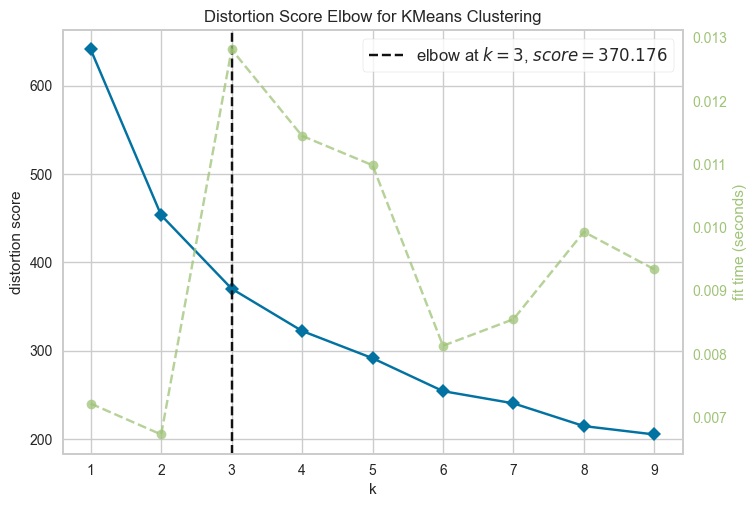

Silhouette Score untuk jumlah cluster 3: 0.27855397613318
Model KMeans berhasil disimpan ke dalam 'best_model_clustering.pkl'
Hasil clustering dan model KMeans berhasil disimpan ke dalam 'clustering_results.h5'


<Figure size 800x550 with 0 Axes>

In [65]:
import joblib
import h5py
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

# Ambil fitur numerik yang sudah dinormalisasi untuk clustering
X_scaled = data_normalized[numerical_columns]

# Membuat model KMeans untuk mencari jumlah klaster optimal
kmeans = KMeans(random_state=42, n_init='auto')

# Menggunakan KElbowVisualizer untuk menemukan jumlah klaster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(X_scaled)  # Fit data
visualizer.show()  # Tampilkan grafik Elbow

# Menyimpan visualisasi elbow ke dalam file .png
visualizer.fig.savefig('elbow_method_visualization.png')

# Dapatkan jumlah klaster optimal dari visualizer
optimal_k = visualizer.elbow_value_

# Fit ulang model KMeans dengan jumlah klaster optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
kmeans.fit(X_scaled)

# 3. **Evaluasi Model menggunakan Silhouette Score**
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score untuk jumlah cluster {kmeans.n_clusters}: {silhouette_avg}")

# 4. **Menambahkan hasil clustering dan mengganti label 'Cluster' menjadi 'Target'**
data_cleaned['Target'] = kmeans.labels_  # Menyimpan hasil clustering ke dalam kolom 'Target'

# Menyimpan Model KMeans menggunakan joblib
joblib.dump(kmeans, 'best_model_clustering.pkl')  # Menyimpan model KMeans ke dalam file .pkl
print("Model KMeans berhasil disimpan ke dalam 'best_model_clustering.pkl'")

# 5. **Menyimpan Hasil Clustering dan Model KMeans ke dalam file .h5**
with h5py.File('clustering_results.h5', 'w') as f:
    # Menyimpan parameter model KMeans
    f.create_dataset('kmeans_centroids', data=kmeans.cluster_centers_)
    f.create_dataset('kmeans_labels', data=kmeans.labels_)
    f.create_dataset('kmeans_inertia', data=kmeans.inertia_)
    f.create_dataset('kmeans_n_iter', data=kmeans.n_iter_)

print("Hasil clustering dan model KMeans berhasil disimpan ke dalam 'clustering_results.h5'")


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [66]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

PCA model dan hasil transformasi berhasil disimpan sebagai 'pca_model_clustering.h5'
Visualisasi PCA berhasil disimpan sebagai 'pca_clustering_results.png'


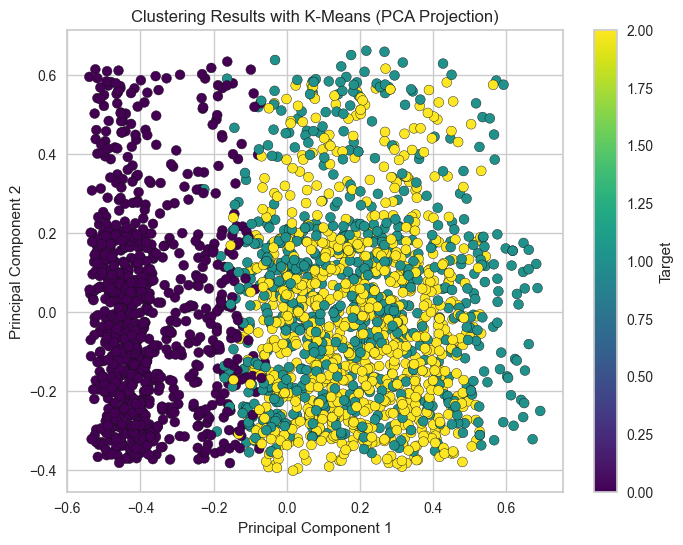

In [67]:
import h5py
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduksi dimensi data menjadi 2D menggunakan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Menyimpan PCA model dan hasil transformasi ke dalam file .h5
with h5py.File('pca_model_clustering.h5', 'w') as f:
    f.create_dataset('components', data=pca.components_)
    f.create_dataset('explained_variance', data=pca.explained_variance_)
    f.create_dataset('explained_variance_ratio', data=pca.explained_variance_ratio_)
    f.create_dataset('X_pca', data=X_pca)

print("PCA model dan hasil transformasi berhasil disimpan sebagai 'pca_model_clustering.h5'")

# Tambahkan label cluster ke DataFrame jika belum ada
if 'Target' not in data.columns:
    data['Target'] = kmeans.labels_

# Visualisasi hasil clustering menggunakan scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Target'], cmap='viridis', edgecolors='k', s=50)
plt.title('Clustering Results with K-Means (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target')
plt.grid(True)

# Menyimpan hasil visualisasi ke file sebelum menampilkan plot
plt.savefig('pca_clustering_results.png')
print("Visualisasi PCA berhasil disimpan sebagai 'pca_clustering_results.png'")

# Menampilkan hasil visualisasi
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [68]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 2. **Menstandarisasi Fitur Numerik**
numerical_features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
scaler = StandardScaler()

# Standarisasi fitur numerik
X_scaled = scaler.fit_transform(data[numerical_features])

# 3. **Membalikkan (Inverse) Data Standar ke Data Asli**
X_original = scaler.inverse_transform(X_scaled)  # Mengembalikan data ke bentuk asli

# Menambahkan kembali hasil clustering ke data asli (mengganti 'Cluster' menjadi 'Target')
data['Target'] = kmeans.labels_  # Pastikan kamu sudah memiliki model KMeans sebelumnya

# Membuat DataFrame baru untuk memudahkan analisis
data_original = pd.DataFrame(X_original, columns=numerical_features)
data_original['Target'] = data['Target']  # Mengganti 'Cluster' dengan 'Target'

# Agregasi untuk fitur numerik
cluster_summary = data_original.groupby('Target').agg({
    'TransactionAmount': ['mean', 'min', 'max'],
    'CustomerAge': ['mean', 'min', 'max'],
    'TransactionDuration': ['mean', 'min', 'max'],
    'LoginAttempts': ['mean', 'min', 'max'],
    'AccountBalance': ['mean', 'min', 'max']
})

# Agregasi untuk fitur kategorikal (misalnya 'TransactionType', 'Location', dll.)
categorical_features = ['TransactionType', 'Location', 'Channel']  # Ganti dengan kolom kategorikal yang relevan

# Tambahkan modus fitur kategorikal ke cluster_summary
for feature in categorical_features:
    mode_values = data.groupby('Target')[feature].agg(lambda x: x.mode()[0])
    cluster_summary[(feature, 'mode')] = mode_values

# Menampilkan hasil agregasi yang sudah dihitung (termasuk modus untuk fitur kategorikal)
print(cluster_summary)

# Mengambil hasil agregasi dan format analisis untuk setiap cluster
for target_id in cluster_summary.index:  # Iterate only over existing clusters
    print(f"\nTarget {target_id + 1} didapatkan karena:")
    
    # Fitur numerik
    print(f" - 'TransactionAmount' memiliki nilai rata-rata {cluster_summary.loc[target_id, ('TransactionAmount', 'mean')]}, batas minimum {cluster_summary.loc[target_id, ('TransactionAmount', 'min')]}, dan batas maksimum {cluster_summary.loc[target_id, ('TransactionAmount', 'max')]}.")
    print(f" - 'CustomerAge' memiliki nilai rata-rata {cluster_summary.loc[target_id, ('CustomerAge', 'mean')]}, batas minimum {cluster_summary.loc[target_id, ('CustomerAge', 'min')]}, dan batas maksimum {cluster_summary.loc[target_id, ('CustomerAge', 'max')]}.")
    print(f" - 'TransactionDuration' memiliki nilai rata-rata {cluster_summary.loc[target_id, ('TransactionDuration', 'mean')]}, batas minimum {cluster_summary.loc[target_id, ('TransactionDuration', 'min')]}, dan batas maksimum {cluster_summary.loc[target_id, ('TransactionDuration', 'max')]}.")
    print(f" - 'LoginAttempts' memiliki nilai rata-rata {cluster_summary.loc[target_id, ('LoginAttempts', 'mean')]}, batas minimum {cluster_summary.loc[target_id, ('LoginAttempts', 'min')]}, dan batas maksimum {cluster_summary.loc[target_id, ('LoginAttempts', 'max')]}.")
    print(f" - 'AccountBalance' memiliki nilai rata-rata {cluster_summary.loc[target_id, ('AccountBalance', 'mean')]}, batas minimum {cluster_summary.loc[target_id, ('AccountBalance', 'min')]}, dan batas maksimum {cluster_summary.loc[target_id, ('AccountBalance', 'max')]}.")
    
    # Fitur kategorikal
    for feature in categorical_features:
        print(f" - '{feature}' memiliki nilai modus {cluster_summary.loc[target_id, (feature, 'mode')]}")


       TransactionAmount                CustomerAge              \
                    mean   min      max        mean   min   max   
Target                                                            
0             305.165421  0.26  1762.28   25.953271  18.0  47.0   
1             291.656079  0.32  1919.11   44.413934  18.0  70.0   
2             293.147418  0.84  1830.00   61.778714  42.0  80.0   

       TransactionDuration              LoginAttempts            \
                      mean   min    max          mean  min  max   
Target                                                            
0               120.186916  10.0  300.0      1.123832  1.0  5.0   
1               122.545082  10.0  300.0      1.095628  1.0  5.0   
2               116.122234  10.0  299.0      1.136986  1.0  5.0   

       AccountBalance                    TransactionType Location Channel  
                 mean      min       max            mode     mode    mode  
Target                                    

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [69]:
from sklearn.preprocessing import LabelEncoder

# Encode 'CustomerOccupation'
label_encoder = LabelEncoder()

# Melakukan encoding pada kolom 'CustomerOccupation'
data['CustomerOccupation_encoded'] = label_encoder.fit_transform(data['CustomerOccupation'])

# Melakukan inverse transform untuk mengembalikan label menjadi kategori asli
data['CustomerOccupation_decoded'] = label_encoder.inverse_transform(data['CustomerOccupation_encoded'])

# Menampilkan hasil setelah inverse transform
print(data[['CustomerOccupation', 'CustomerOccupation_encoded', 'CustomerOccupation_decoded']].head())


   CustomerOccupation  CustomerOccupation_encoded  CustomerOccupation_decoded
0                   0                           0                           0
1                   0                           0                           0
2                   3                           3                           3
3                   3                           3                           3
4                   3                           3                           3


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [70]:
# Menambahkan label cluster ke dalam dataset dengan nama kolom 'Target'
data['Target'] = kmeans.labels_  # Gunakan label hasil clustering dari KMeans
# Menghitung statistik deskriptif untuk setiap cluster (dengan 'Target' sebagai label)
cluster_stats = data.groupby('Target')[numerical_features].describe()

# Menampilkan statistik deskriptif
print(cluster_stats)


       TransactionAmount                                                 \
                   count        mean         std   min      25%     50%   
Target                                                                    
0                  856.0  305.165421  297.645131  0.26  87.0525  214.04   
1                  732.0  291.656079  284.018044  0.32  83.6150  209.06   
2                  949.0  293.147418  290.017536  0.84  79.3500  211.36   

                          CustomerAge             ... LoginAttempts       \
             75%      max       count       mean  ...           75%  max   
Target                                            ...                      
0       422.3075  1762.28       856.0  25.953271  ...           1.0  5.0   
1       414.8550  1919.11       732.0  44.413934  ...           1.0  5.0   
2       389.4300  1830.00       949.0  61.778714  ...           1.0  5.0   

       AccountBalance                                                       \
              

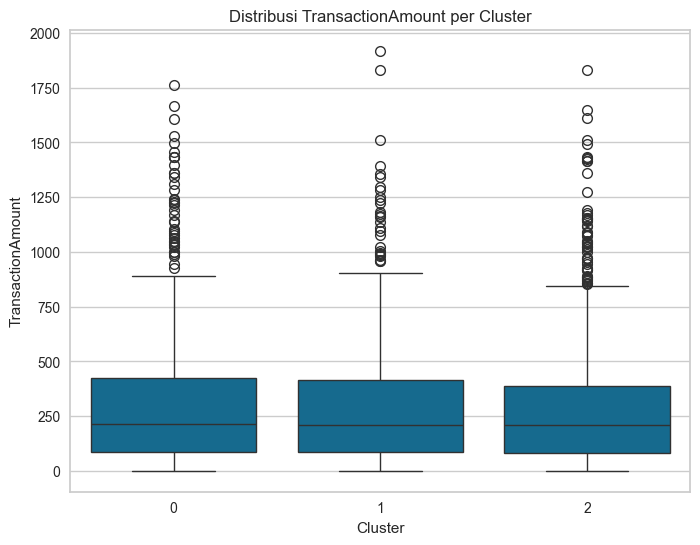

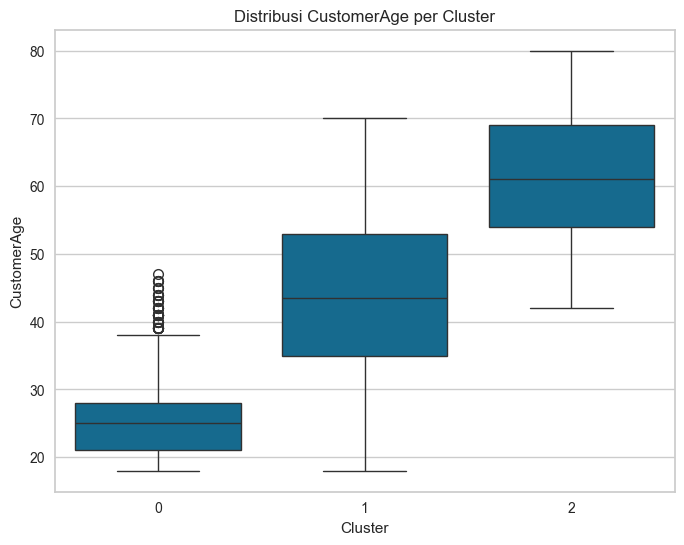

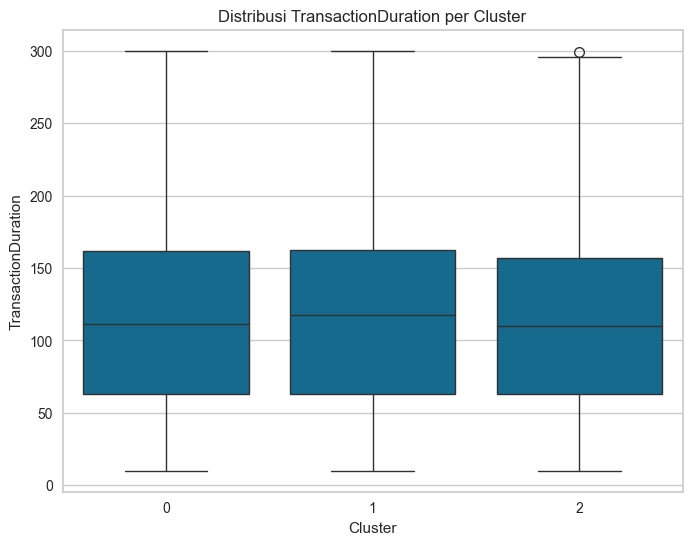

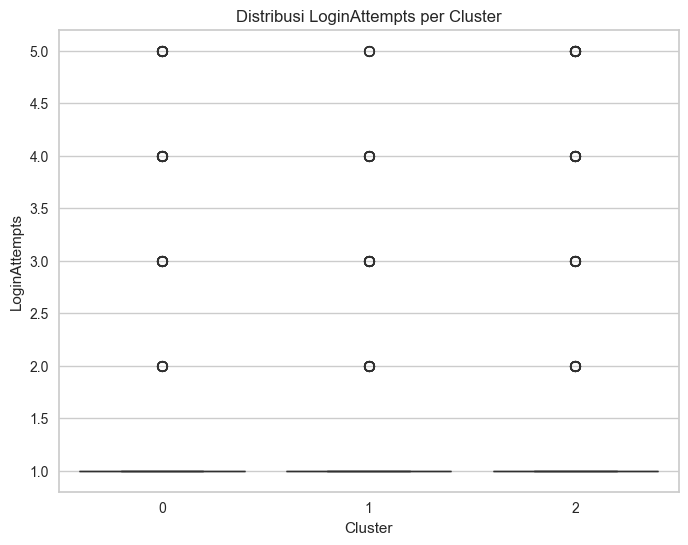

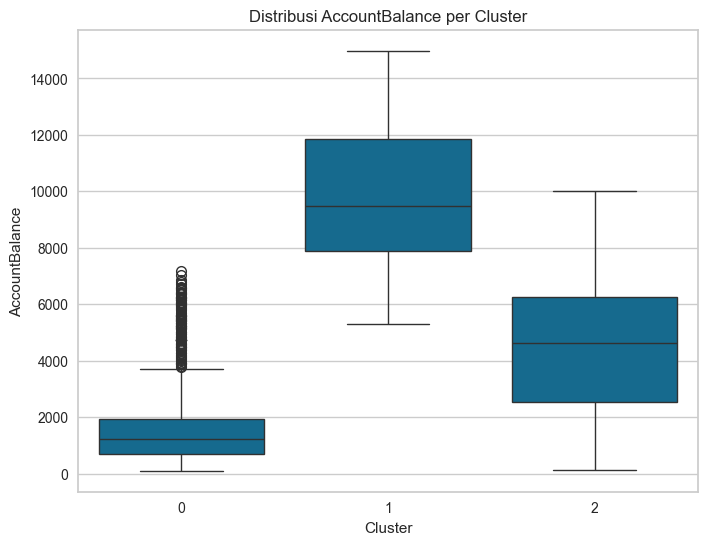

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi untuk setiap fitur berdasarkan cluster ('Target')
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Target', y=feature, data=data)
    plt.title(f'Distribusi {feature} per Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()


# **Analisis Karakteristik Cluster dari Model KMeans**

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans berdasarkan data yang telah Anda sediakan.

---

## **Cluster 0**:
- **Rata-rata TransactionAmount**: 305.17  
- **Rata-rata CustomerAge**: 25.95  
- **Rata-rata TransactionDuration**: 120.19  
- **Rata-rata LoginAttempts**: 1.12  
- **Rata-rata AccountBalance**: 1754.85  
- **TransactionType (modus)**: 1 (misalnya "Debit")  
- **Location (modus)**: 13 (misalnya lokasi tertentu)  
- **Channel (modus)**: 1 (misalnya "Branch")  

### **Analisis**:  
Klaster ini didominasi oleh **nasabah muda dengan transaksi kecil** dan saldo akun yang lebih rendah. Dengan rata-rata usia **25.95**, pelanggan di klaster ini memiliki **aktivitas transaksi yang moderat**. Sebagian besar nasabah di klaster ini menggunakan **saluran cabang fisik** (Branch) untuk melakukan transaksi mereka. Ini mungkin menunjukkan bahwa nasabah muda ini lebih sering melakukan transaksi langsung melalui cabang.

---

## **Cluster 1**:
- **Rata-rata TransactionAmount**: 291.66  
- **Rata-rata CustomerAge**: 44.41  
- **Rata-rata TransactionDuration**: 122.55  
- **Rata-rata LoginAttempts**: 1.10  
- **Rata-rata AccountBalance**: 9872.59  
- **TransactionType (modus)**: 1 (misalnya "Debit")  
- **Location (modus)**: 13 (misalnya lokasi tertentu)  
- **Channel (modus)**: 1 (misalnya "Branch")  

### **Analisis**:  
Klaster ini mencakup **nasabah dengan usia yang lebih dewasa** (rata-rata **44.41**) dan saldo akun yang lebih tinggi (rata-rata **9872.59**). Nasabah di klaster ini masih lebih sering menggunakan **saluran cabang fisik** untuk melakukan transaksi, meskipun mereka memiliki transaksi yang lebih besar dibandingkan klaster pertama. Mereka cenderung lebih stabil secara finansial.

---

## **Cluster 2**:
- **Rata-rata TransactionAmount**: 293.15  
- **Rata-rata CustomerAge**: 61.78  
- **Rata-rata TransactionDuration**: 116.12  
- **Rata-rata LoginAttempts**: 1.14  
- **Rata-rata AccountBalance**: 4461.18  
- **TransactionType (modus)**: 1 (misalnya "Debit")  
- **Location (modus)**: 13 (misalnya lokasi tertentu)  
- **Channel (modus)**: 1 (misalnya "Branch")  

### **Analisis**:  
Klaster ini terdiri dari **nasabah yang lebih tua** (rata-rata **61.78**), dengan transaksi yang sedikit lebih kecil dibandingkan dengan Klaster 1 dan 2, tetapi saldo akun mereka lebih tinggi. Meskipun saldo lebih tinggi, mereka lebih cenderung menggunakan **saluran cabang fisik** untuk melakukan transaksi mereka. Ini menunjukkan nasabah yang lebih stabil dan konservatif dalam pengelolaan keuangan mereka.

---

# **Kesimpulan Umum**:
- **Cluster 0**: **Nasabah muda dengan transaksi kecil** dan saldo rendah, lebih memilih **saluran cabang fisik**.
- **Cluster 1**: **Nasabah dewasa dengan saldo lebih tinggi**, lebih sering menggunakan **saluran cabang fisik**.
- **Cluster 2**: **Nasabah senior dengan saldo cukup tinggi**, masih cenderung menggunakan **saluran cabang fisik** untuk transaksi.

---

**Analisis ini memberikan wawasan tentang pola pengeluaran, saldo akun, dan preferensi saluran transaksi yang digunakan oleh nasabah di masing-masing klaster.** Hal ini dapat digunakan untuk menyesuaikan strategi pemasaran atau layanan yang lebih terfokus pada karakteristik pelanggan di masing-masing klaster.


# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [72]:
# Menambahkan hasil clustering (label) ke dalam data
data_cleaned['Target'] = kmeans.labels_  # Mengganti 'Cluster' dengan 'Target'

# Tampilkan beberapa data untuk memastikan kolom 'Target' sudah ditambahkan
print(data_cleaned.head())

# Simpan hasil clustering ke dalam file CSV
data_cleaned.to_csv('data_with_target.csv', index=False)

print("Hasil clustering telah disimpan dalam file 'data_with_target.csv'")


   TransactionAmount  TransactionDate  TransactionType  Location  Channel  \
0              14.09              680                1        36        0   
1             376.24             1178                1        15        0   
2             126.29             1262                1        23        2   
3             184.50              818                1        33        2   
4              13.45             1939                0         1        2   

   CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0                   0                 81.0            1.0   
1         68.0                   0                141.0            1.0   
2         19.0                   3                 56.0            1.0   
3         26.0                   3                 25.0            1.0   
4         45.0                   3                198.0            1.0   

   AccountBalance  PreviousTransactionDate AgeGroup  Target  
0         5112.21             